In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [3]:
df=pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# performing eda and visualization on data

In [4]:
df.shape

(15039, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
correlation=df.corr()
correlation

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

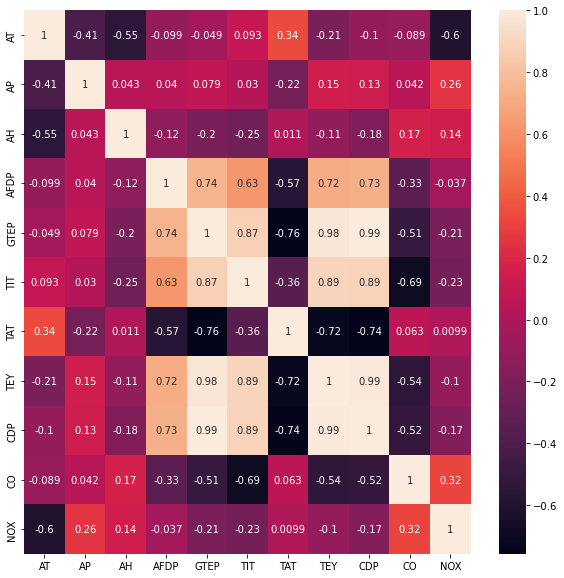

In [9]:
#creating heat map of correlation
plt.figure(figsize=(10,10)),
sns.heatmap(correlation,annot=True)

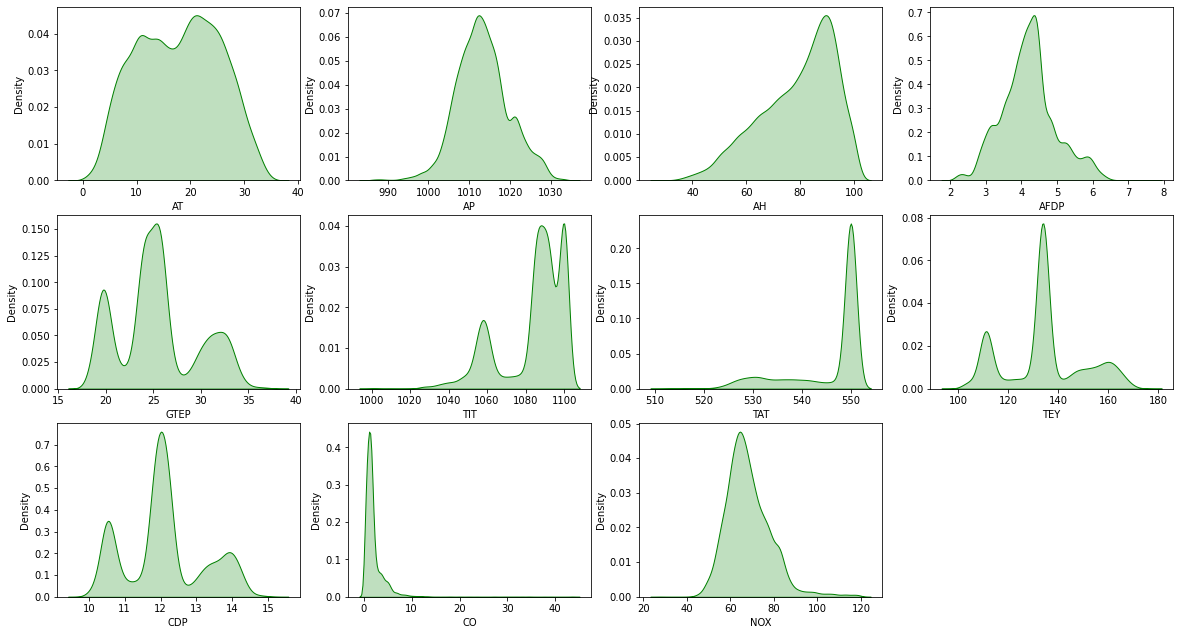

In [10]:
#kde plot for numerical values

no_columns=df.columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[column],color='g',shade=True)

([<AxesSubplot:title={'center':'NOX'}>,
  <AxesSubplot:title={'center':'NOX'}>,
  Text(0.5, 1.0, 'NOX')],
 [<AxesSubplot:xlabel='NOX'>, <AxesSubplot:xlabel='NOX'>])

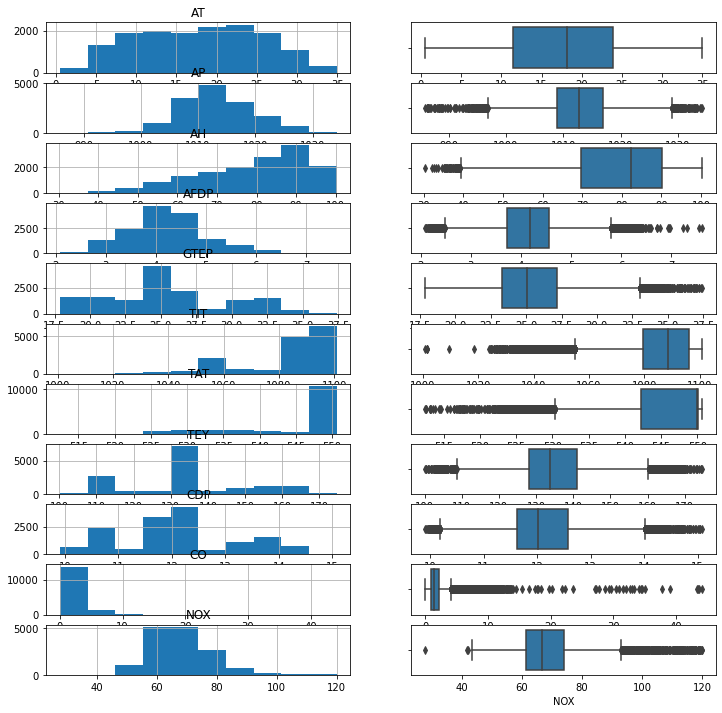

In [11]:
# ploting hist


plt.figure(figsize=(12,12))
[plt.subplot(11,2,1),df['AT'].hist(),plt.title('AT')],[plt.subplot(11,2,2),sns.boxplot(x=df['AT'])]
[plt.subplot(11,2,3),df['AP'].hist(),plt.title('AP')],[plt.subplot(11,2,4),sns.boxplot(x=df['AP'])]
[plt.subplot(11,2,5),df['AH'].hist(),plt.title('AH')],[plt.subplot(11,2,6),sns.boxplot(x=df['AH'])]
[plt.subplot(11,2,7),df['AFDP'].hist(),plt.title("AFDP")],[plt.subplot(11,2,8),sns.boxplot(x=df['AFDP'])]
[plt.subplot(11,2,9),df['GTEP'].hist(),plt.title('GTEP')],[plt.subplot(11,2,10),sns.boxplot(x=df['GTEP'])]
[plt.subplot(11,2,11),df['TIT'].hist(),plt.title('TIT')],[plt.subplot(11,2,12),sns.boxplot(x=df['TIT'])]
[plt.subplot(11,2,13),df['TAT'].hist(),plt.title('TAT')],[plt.subplot(11,2,14),sns.boxplot(x=df['TAT'])]
[plt.subplot(11,2,15),df['TEY'].hist(),plt.title('TEY')],[plt.subplot(11,2,16),sns.boxplot(x=df['TEY'])]

[plt.subplot(11,2,17),df['CDP'].hist(),plt.title("CDP")],[plt.subplot(11,2,18),sns.boxplot(x=df["CDP"])]

[plt.subplot(11,2,19),df['CO'].hist(),plt.title("CO")],[plt.subplot(11,2,20),sns.boxplot(x=df["CO"])]

[plt.subplot(11,2,21),df['NOX'].hist(),plt.title("NOX")],[plt.subplot(11,2,22),sns.boxplot(x=df["NOX"])]

In [12]:
# split into input (X) and output (Y) variables
x =df.iloc[:,0:12]
y = df['TEY']

In [13]:
x=x.drop(['TEY'],axis=1)

In [14]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [15]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [16]:
# fix random seed for reproducibility
seed = 10
numpy.random.seed(seed)

In [17]:
# create model
model = Sequential()
model.add(Dense(25, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='tanh')) #4rd layer or op layer
model.add(Dense(25, kernel_initializer='uniform', activation='leaky_relu')) #5rd layer or op layer
   

In [18]:
model.compile(loss ='mse',optimizer ='adam',metrics =['mean_absolute_percentage_error'] )
model

In [19]:
fil1_model=model.fit(x,y,validation_split=0.30,epochs=50,batch_size=20)

Epoch 1/50
527/527 [==============================] - 3s 4ms/step - loss: 16728.3965 - mean_absolute_percentage_error: 94.6549 - val_loss: 13996.5889 - val_mean_absolute_percentage_error: 89.2141
Epoch 2/50
527/527 [==============================] - 2s 3ms/step - loss: 13490.1387 - mean_absolute_percentage_error: 84.6977 - val_loss: 11144.6641 - val_mean_absolute_percentage_error: 79.2894
Epoch 3/50
527/527 [==============================] - 2s 4ms/step - loss: 10762.0234 - mean_absolute_percentage_error: 75.3019 - val_loss: 8736.5713 - val_mean_absolute_percentage_error: 69.8401
Epoch 4/50
527/527 [==============================] - 2s 3ms/step - loss: 8450.7197 - mean_absolute_percentage_error: 66.3432 - val_loss: 6713.0889 - val_mean_absolute_percentage_error: 60.7991
Epoch 5/50
527/527 [==============================] - 3s 6ms/step - loss: 6508.2822 - mean_absolute_percentage_error: 57.7594 - val_loss: 5034.6470 - val_mean_absolute_percentage_error: 52.1529
Epoch 6/50
527/527 [=====

Epoch 44/50
527/527 [==============================] - 2s 3ms/step - loss: 254.8697 - mean_absolute_percentage_error: 8.6599 - val_loss: 244.1950 - val_mean_absolute_percentage_error: 9.5345
Epoch 45/50
527/527 [==============================] - 2s 3ms/step - loss: 254.8743 - mean_absolute_percentage_error: 8.6040 - val_loss: 245.9974 - val_mean_absolute_percentage_error: 9.6263
Epoch 46/50
527/527 [==============================] - 2s 3ms/step - loss: 254.8979 - mean_absolute_percentage_error: 8.6297 - val_loss: 246.2586 - val_mean_absolute_percentage_error: 9.6393
Epoch 47/50
527/527 [==============================] - 2s 3ms/step - loss: 254.8768 - mean_absolute_percentage_error: 8.6359 - val_loss: 245.4856 - val_mean_absolute_percentage_error: 9.6006
Epoch 48/50
527/527 [==============================] - 2s 3ms/step - loss: 254.8924 - mean_absolute_percentage_error: 8.5911 - val_loss: 247.6542 - val_mean_absolute_percentage_error: 9.7075
Epoch 49/50
527/527 [========================

In [20]:
#fit the model
fil_model=model.fit(x,y,validation_split=0.30,epochs=150,batch_size=20)

Epoch 1/150
527/527 [==============================] - 2s 4ms/step - loss: 254.8818 - mean_absolute_percentage_error: 8.6287 - val_loss: 245.8204 - val_mean_absolute_percentage_error: 9.6174
Epoch 2/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8460 - mean_absolute_percentage_error: 8.6434 - val_loss: 244.6180 - val_mean_absolute_percentage_error: 9.5564
Epoch 3/150
527/527 [==============================] - 2s 4ms/step - loss: 254.8275 - mean_absolute_percentage_error: 8.5809 - val_loss: 247.6469 - val_mean_absolute_percentage_error: 9.7072
Epoch 4/150
527/527 [==============================] - 2s 4ms/step - loss: 254.8642 - mean_absolute_percentage_error: 8.6452 - val_loss: 245.4364 - val_mean_absolute_percentage_error: 9.5981
Epoch 5/150
527/527 [==============================] - 2s 4ms/step - loss: 254.8622 - mean_absolute_percentage_error: 8.6134 - val_loss: 248.2870 - val_mean_absolute_percentage_error: 9.7379
Epoch 6/150
527/527 [========================

Epoch 44/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8606 - mean_absolute_percentage_error: 8.6595 - val_loss: 243.2209 - val_mean_absolute_percentage_error: 9.4835
Epoch 45/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8767 - mean_absolute_percentage_error: 8.6267 - val_loss: 243.7301 - val_mean_absolute_percentage_error: 9.5103
Epoch 46/150
527/527 [==============================] - 2s 3ms/step - loss: 254.9578 - mean_absolute_percentage_error: 8.5836 - val_loss: 245.8380 - val_mean_absolute_percentage_error: 9.6183
Epoch 47/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8735 - mean_absolute_percentage_error: 8.6208 - val_loss: 246.4633 - val_mean_absolute_percentage_error: 9.6494
Epoch 48/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8855 - mean_absolute_percentage_error: 8.6196 - val_loss: 245.8882 - val_mean_absolute_percentage_error: 9.6208
Epoch 49/150
527/527 [==================

Epoch 87/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8591 - mean_absolute_percentage_error: 8.6327 - val_loss: 244.7269 - val_mean_absolute_percentage_error: 9.5620
Epoch 88/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8498 - mean_absolute_percentage_error: 8.6371 - val_loss: 243.6302 - val_mean_absolute_percentage_error: 9.5051
Epoch 89/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8822 - mean_absolute_percentage_error: 8.5864 - val_loss: 246.6811 - val_mean_absolute_percentage_error: 9.6601
Epoch 90/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8737 - mean_absolute_percentage_error: 8.6444 - val_loss: 244.3052 - val_mean_absolute_percentage_error: 9.5402
Epoch 91/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8550 - mean_absolute_percentage_error: 8.5782 - val_loss: 248.3352 - val_mean_absolute_percentage_error: 9.7402
Epoch 92/150
527/527 [==================

527/527 [==============================] - 2s 3ms/step - loss: 254.8768 - mean_absolute_percentage_error: 8.6420 - val_loss: 244.7811 - val_mean_absolute_percentage_error: 9.5647
Epoch 130/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8428 - mean_absolute_percentage_error: 8.6186 - val_loss: 245.2561 - val_mean_absolute_percentage_error: 9.5890
Epoch 131/150
527/527 [==============================] - 2s 3ms/step - loss: 254.9171 - mean_absolute_percentage_error: 8.6256 - val_loss: 245.5785 - val_mean_absolute_percentage_error: 9.6053
Epoch 132/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8846 - mean_absolute_percentage_error: 8.6018 - val_loss: 246.5627 - val_mean_absolute_percentage_error: 9.6543
Epoch 133/150
527/527 [==============================] - 2s 3ms/step - loss: 254.8892 - mean_absolute_percentage_error: 8.6628 - val_loss: 245.0793 - val_mean_absolute_percentage_error: 9.5800
Epoch 134/150
527/527 [==========================

In [21]:
#evaluating the model
score=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 251.9104 - mean_absolute_percentage_error: 8.8925
mean_absolute_percentage_error: 889.25%


In [26]:
score

[251.9104461669922, 8.892472267150879]

In [27]:
#visualizing the trainig history,score,metric name

model.metrics_names,score,fil_model.history.keys

(['loss', 'mean_absolute_percentage_error'],
 [251.9104461669922, 8.892472267150879],
 <function dict.keys>)

In [28]:
fil1_model.history['mean_absolute_percentage_error'] #just for understanding

[94.65487670898438,
 84.69768524169922,
 75.3018569946289,
 66.34318542480469,
 57.7594108581543,
 49.5582160949707,
 41.73020553588867,
 34.3348388671875,
 27.404394149780273,
 21.009660720825195,
 16.133859634399414,
 13.146305084228516,
 10.932456970214844,
 9.378297805786133,
 8.437923431396484,
 8.2824125289917,
 8.481122016906738,
 8.593681335449219,
 8.62890625,
 8.628100395202637,
 8.63365364074707,
 8.598875045776367,
 8.659768104553223,
 8.585193634033203,
 8.644036293029785,
 8.611103057861328,
 8.632482528686523,
 8.641032218933105,
 8.666165351867676,
 8.574692726135254,
 8.607831001281738,
 8.643366813659668,
 8.62106704711914,
 8.637735366821289,
 8.618075370788574,
 8.670674324035645,
 8.60106372833252,
 8.619514465332031,
 8.612665176391602,
 8.600865364074707,
 8.650582313537598,
 8.642045974731445,
 8.614021301269531,
 8.65992546081543,
 8.604025840759277,
 8.629659652709961,
 8.635872840881348,
 8.591147422790527,
 8.656694412231445,
 8.615860939025879]

In [29]:
fil1_model.history['val_mean_absolute_percentage_error'] #just for understanding

[89.21405029296875,
 79.28939819335938,
 69.84007263183594,
 60.79905700683594,
 52.15294647216797,
 43.895259857177734,
 36.049564361572266,
 28.644893646240234,
 21.74101448059082,
 15.752715110778809,
 12.662901878356934,
 11.063365936279297,
 10.015313148498535,
 9.398164749145508,
 9.109511375427246,
 9.36000919342041,
 9.57559585571289,
 9.613256454467773,
 9.624551773071289,
 9.57970905303955,
 9.562088012695312,
 9.690000534057617,
 9.539469718933105,
 9.666908264160156,
 9.623636245727539,
 9.671104431152344,
 9.653193473815918,
 9.607919692993164,
 9.428255081176758,
 9.620561599731445,
 9.694704055786133,
 9.62417984008789,
 9.682080268859863,
 9.591423988342285,
 9.621612548828125,
 9.510090827941895,
 9.572324752807617,
 9.617029190063477,
 9.665846824645996,
 9.783456802368164,
 9.716355323791504,
 9.669544219970703,
 9.730786323547363,
 9.534478187561035,
 9.626283645629883,
 9.639275550842285,
 9.60058879852295,
 9.707521438598633,
 9.57976245880127,
 9.628530502319336]

In [30]:
fil1_model.history['loss']

[16728.396484375,
 13490.138671875,
 10762.0234375,
 8450.7197265625,
 6508.2822265625,
 4896.998046875,
 3584.357666015625,
 2541.731689453125,
 1740.7491455078125,
 1153.930419921875,
 750.6893920898438,
 496.3490905761719,
 354.5981140136719,
 288.0577697753906,
 263.062255859375,
 256.1998596191406,
 254.96986389160156,
 254.8421630859375,
 254.86264038085938,
 254.85633850097656,
 254.84280395507812,
 254.85147094726562,
 254.8549041748047,
 254.8729705810547,
 254.88531494140625,
 254.90003967285156,
 254.88327026367188,
 254.8940887451172,
 254.80006408691406,
 254.92303466796875,
 254.84800720214844,
 254.89370727539062,
 254.87429809570312,
 254.8896942138672,
 254.88717651367188,
 254.83523559570312,
 254.9061279296875,
 254.89414978027344,
 254.875244140625,
 254.7962188720703,
 254.88766479492188,
 254.89248657226562,
 254.84910583496094,
 254.86972045898438,
 254.87428283691406,
 254.89785766601562,
 254.87681579589844,
 254.89242553710938,
 254.9058380126953,
 254.8808288

In [31]:
fil1_model.history['val_loss']

[13996.5888671875,
 11144.6640625,
 8736.5712890625,
 6713.0888671875,
 5034.64697265625,
 3665.873779296875,
 2577.42626953125,
 1739.677490234375,
 1124.236083984375,
 702.1866455078125,
 439.1174011230469,
 298.29425048828125,
 240.57089233398438,
 228.81495666503906,
 234.19569396972656,
 240.9178924560547,
 244.99313354492188,
 245.73733520507812,
 245.9628448486328,
 245.0738525390625,
 244.72933959960938,
 247.29202270507812,
 244.2913055419922,
 246.81881713867188,
 245.94436645507812,
 246.9045867919922,
 246.5400848388672,
 245.63111877441406,
 242.17991638183594,
 245.8829803466797,
 247.3889617919922,
 245.95533752441406,
 247.12924194335938,
 245.30435180664062,
 245.90406799316406,
 243.72642517089844,
 244.92918395996094,
 245.81256103515625,
 246.797119140625,
 249.24493408203125,
 247.83763122558594,
 246.8724822998047,
 248.13858032226562,
 244.19497680664062,
 245.99742126464844,
 246.2585906982422,
 245.48562622070312,
 247.6541748046875,
 245.07493591308594,
 246.0

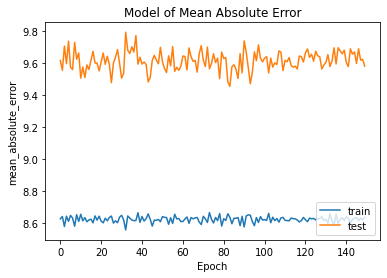

In [36]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['mean_absolute_percentage_error'])
plt.plot(fil_model.history['val_mean_absolute_percentage_error'])
plt.title('Model of Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

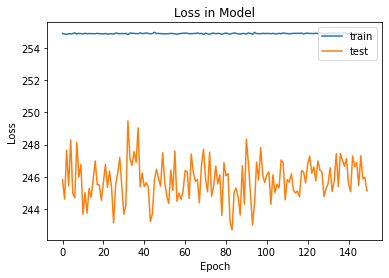

In [37]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()